Top feature contributions (bar chart):


/Users/AlexCorbin_1/anaconda3/envs/hcmle-env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


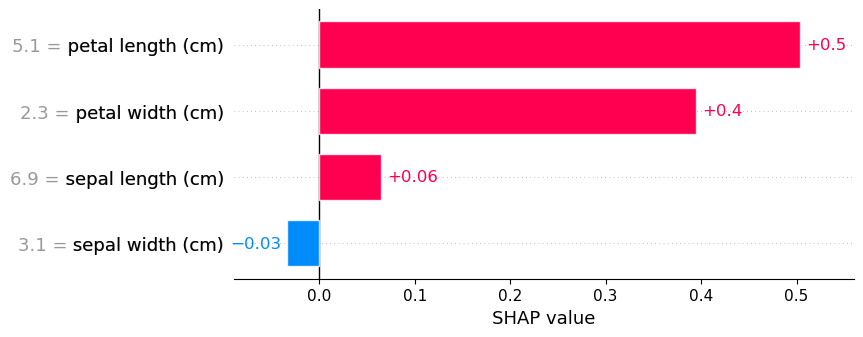

Detailed explanation (waterfall):


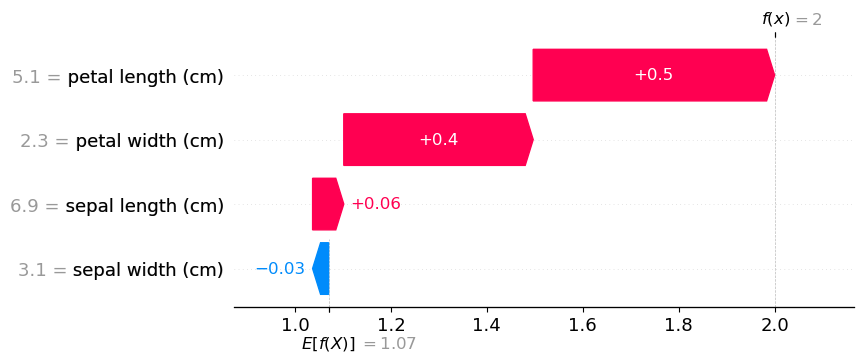

In [ ]:
import shap
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load data and split
iris = load_iris(as_frame=True)
X = iris.data
y = iris.target
feature_names = X.columns
class_names = iris.target_names

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Fit model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Create SHAP explainer with feature metadata
explainer = shap.Explainer(model.predict, X_train, feature_names=feature_names)

# Select instance to explain (e.g., instance 7 from test set)
instance_index = 7
instance_to_explain = X_test.iloc[[instance_index]]  # Keep 2D

# Compute SHAP values
shap_values = explainer(instance_to_explain)

# Visualize with bar and waterfall plot
print("Top feature contributions (bar chart):")
shap.plots.bar(shap_values[0], max_display=4)

print("Detailed explanation (waterfall):")
shap.plots.waterfall(shap_values[0])

### Prediction Explanation for Instance 7

**Prediction: Class 2 (Virginica)**  
The model predicted this flower belongs to **class 2 (Virginica)** based on the following top 3 feature contributions:

1. **Petal Length = 5.1 cm**  
   This had the **strongest positive impact** on the prediction. Virginica flowers tend to have longer petals, so this value strongly pushed the prediction toward class 2.

2. **Petal Width = 2.3 cm**  
   Also had a **large positive contribution**. This width is more typical of Virginica than the other species, further reinforcing the model’s prediction.

3. **Sepal Length = 6.9 cm**  
   This value had a **small positive influence**. While less significant than the petal features, a longer sepal length is slightly more common in Virginica.

**What pushed against the prediction?**  
- **Sepal Width = 3.1 cm** had a very minor negative effect. This width is slightly less typical of Virginica, but it wasn’t strong enough to change the overall outcome.

### Summary  
The model predicted class 2 because both the **petal length and petal width** closely matched what it expects from Virginica flowers. The SHAP explanation confirms this reasoning, showing those two features as the most influential drivers of the prediction.

In [8]:
model.predict([instance_to_explain.values[0]])

/Users/AlexCorbin_1/anaconda3/envs/hcmle-env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([2])